# EDA bank-marketing-campaign-data

## Set up

In [1]:
#!pip install edastatmil_milser
import pandas as pd
from edastatmil_milser import edas_tatmil as EDA
import os

In [2]:
raw_df = pd.read_csv('../data/raw/Diabetes.csv')
raw_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


El dataset tiene 41188 instanias con 21 variables, de estas vamosa a centrarnos en Y que utilizaremos para determinar el exito que ha tenido un apartamento.

## Objetivo

El obterivo es saber si el paciente tiene diabetes ap artir de las muestras. La target sera "Outcome", 0 es negativo para diabetes 1 sera positivo

## Exploración y limpieza superficial

### Dimensiones

In [3]:
categorical, numerical = EDA.explore(raw_df)


Rows: 768
Columns: 9
+--------------------------+----------------+------------+-----------+---------------+
|                          | Non-Null Count | Null Count | Data Type | Data Category |
+--------------------------+----------------+------------+-----------+---------------+
|       Pregnancies        |      768       |     0      |   int64   |   Numerical   |
|         Glucose          |      768       |     0      |   int64   |   Numerical   |
|      BloodPressure       |      768       |     0      |   int64   |   Numerical   |
|      SkinThickness       |      768       |     0      |   int64   |   Numerical   |
|         Insulin          |      768       |     0      |   int64   |   Numerical   |
|           BMI            |      768       |     0      |  float64  |   Numerical   |
| DiabetesPedigreeFunction |      768       |     0      |  float64  |   Numerical   |
|           Age            |      768       |     0      |   int64   |   Numerical   |
|         Outcome     

El dataset contiene 768 filas y 9 columnas.
Tenemos 8 caracteristicas y 1 objetivo.

Es un conjunto de datos pequeño, sin valores nulos y con todas las columnas numéricas, aunque nuestra variable objetivo es categórica y ya está factorizada. Toda la información es relevante, por lo que no eliminamos ninguna característica a priori.

### Analysis univariante

#### Categoricas

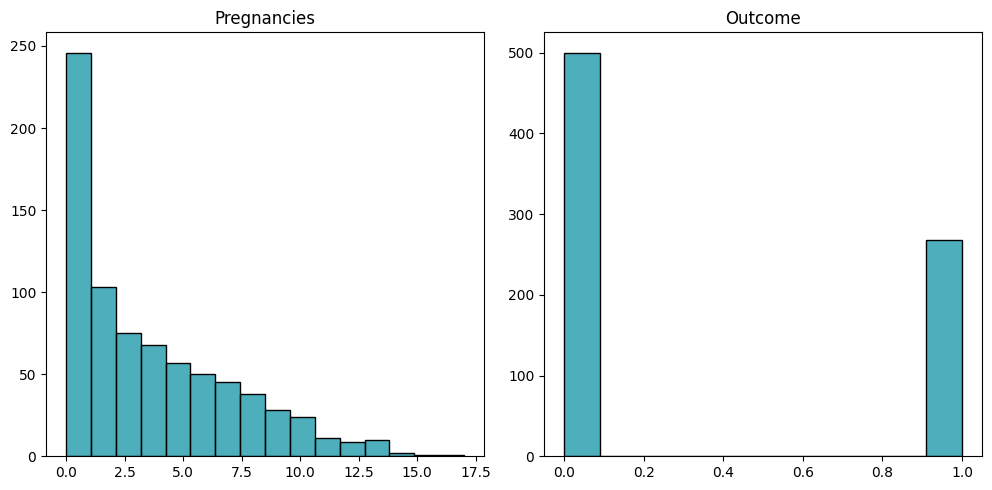

In [4]:
EDA.univariate_hist(['Pregnancies','Outcome'], raw_df)


In [5]:
aprox_H = (raw_df['Pregnancies'] != 0).sum()
aprox_V = (raw_df['Pregnancies'] == 0).sum()

print('N woman aprox:', aprox_H)
print('N men aprox:', aprox_V)

N woman aprox: 657
N men aprox: 111


Dado que no disponemos del sexo de los individuos, una manera de aproximarnos al número de hombres y mujeres en el conjunto de datos es considerar la cantidad de personas que han tenido al menos un embarazo y las que no han tenido ninguno. Aunque muchas mujeres pueden no haber tenido hijos, la diferencia es lo bastante significativa como para cuestionarnos si entrenar el modelo con estos datos podría generar un sesgo y hacer mejores predicciones para mujeres que para hombres.

##### Graficos Numericos


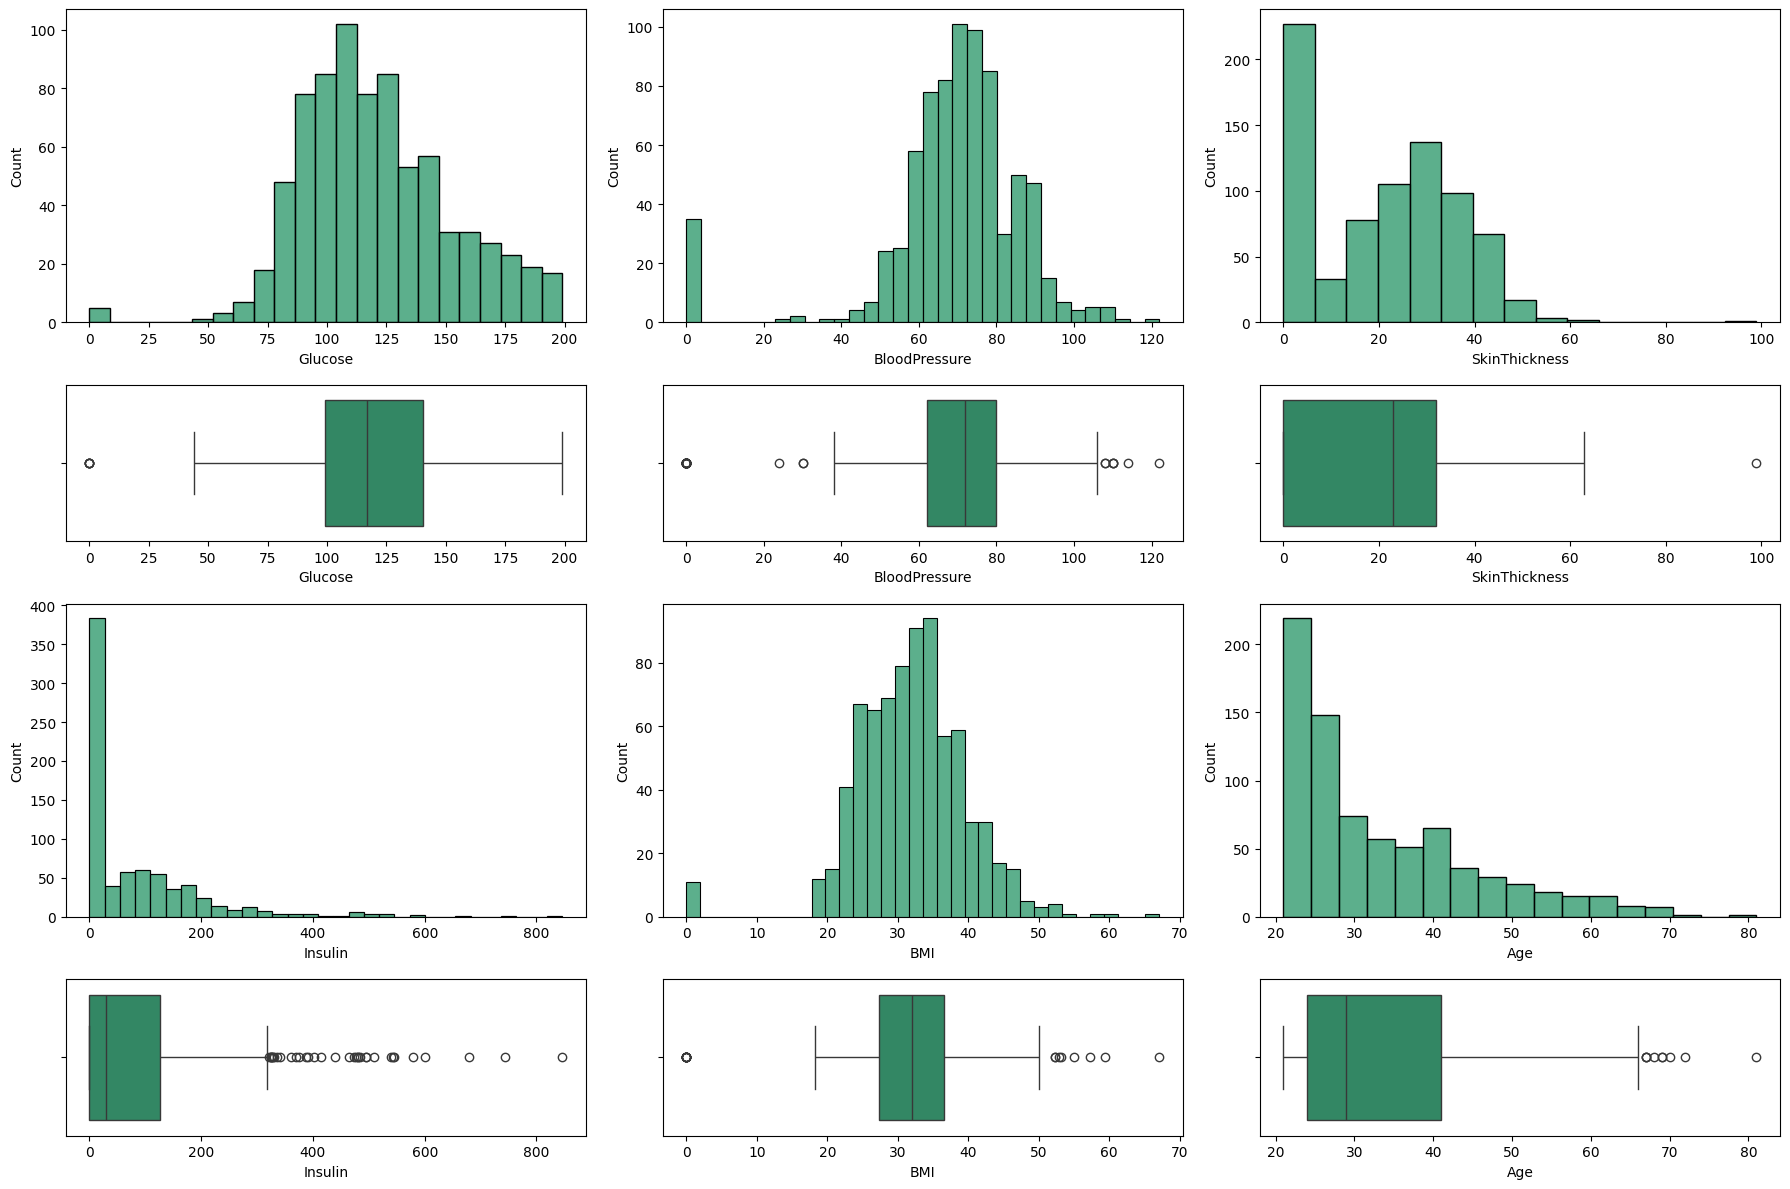

In [9]:
EDA.univariate_histbox(['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age'], raw_df,color= '#259566')



En general, los datos parecen estar bastante bien agrupados, aunque se observan algunos valores atípicos que deberán ser tratados más adelante.

### Analisis multivariante

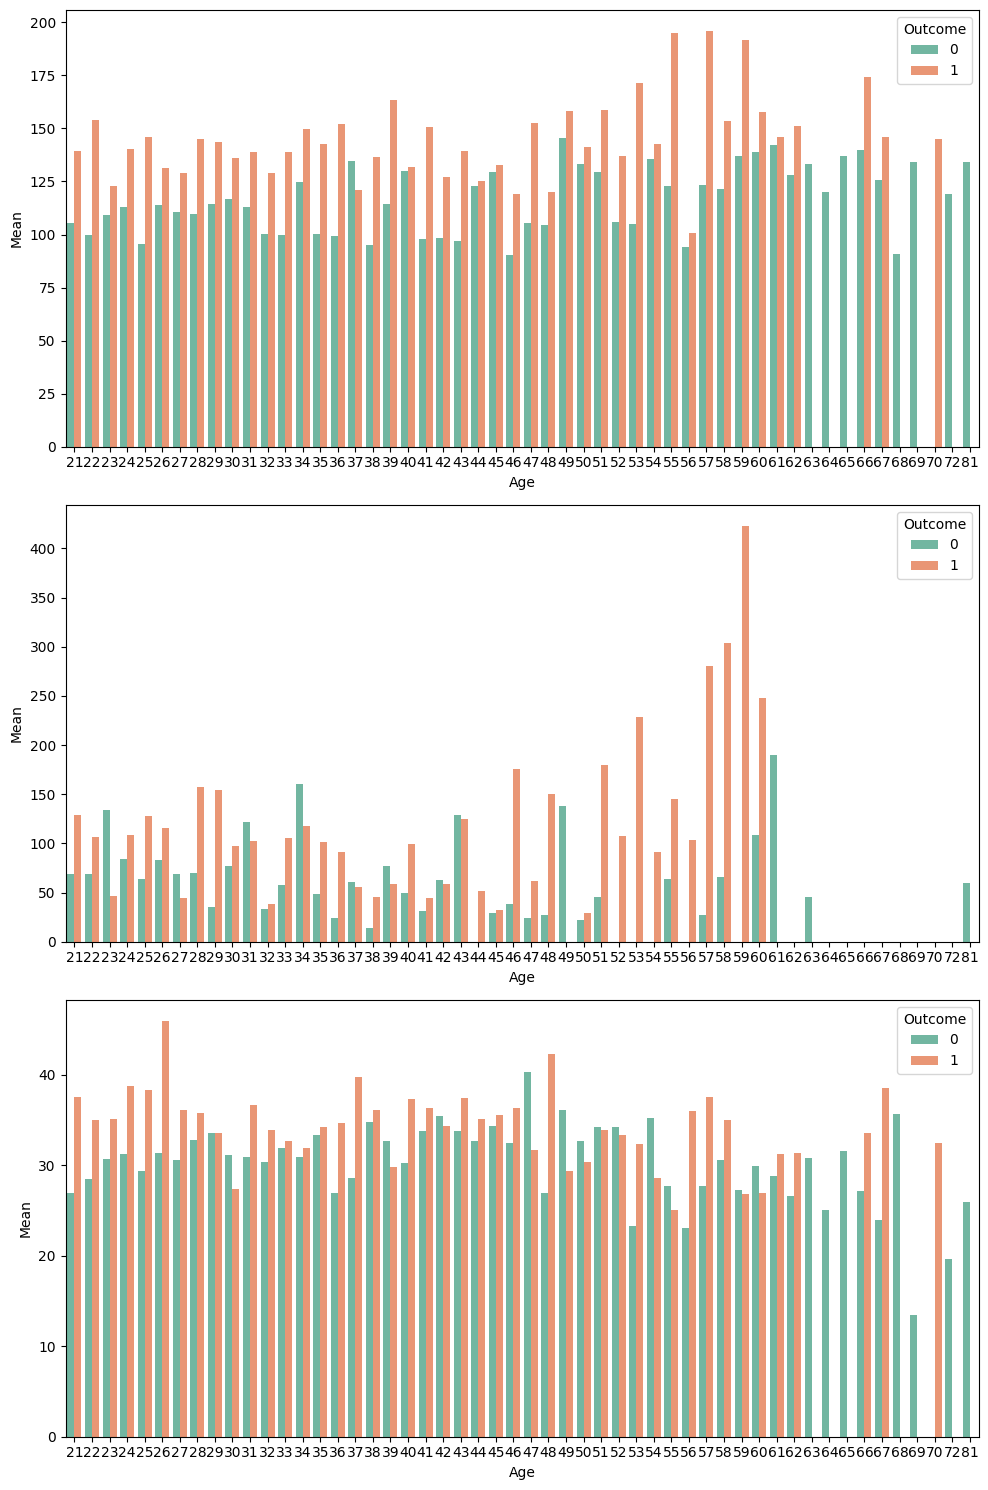

In [12]:
list1 = ['Age', 'Glucose','Outcome']
list2 = ['Age', 'Insulin','Outcome']
list3 = ['Age', 'BMI','Outcome']
variable_lists = [list1,list2,list3]
EDA.multivariate_barplots(raw_df, variable_lists,y='mean')


A todas las edades, un IMC alto parece indicar una mayor probabilidad de tener diabetes. Asimismo, las personas con diabetes tienen niveles de glucosa más altos en todas las edades. En edades avanzadas, las personas con diabetes presentan niveles de insulina más elevados.

También se observa que en el conjunto de datos hay pocas personas mayores que tienen diabetes.

---------------------------------

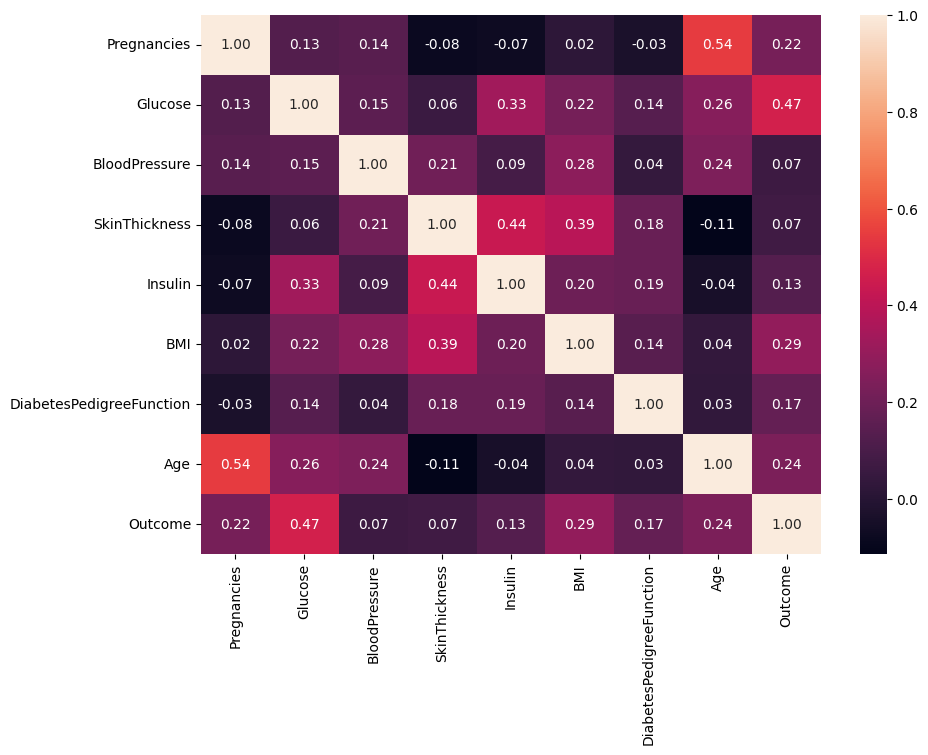

In [13]:
_, df = EDA.correlation_matrix(raw_df, [],(10,7))




Es posible que solo la presión arterial no sea determinante, por lo que realizaremos una selección de características dejando 8 características.

### DAY 2

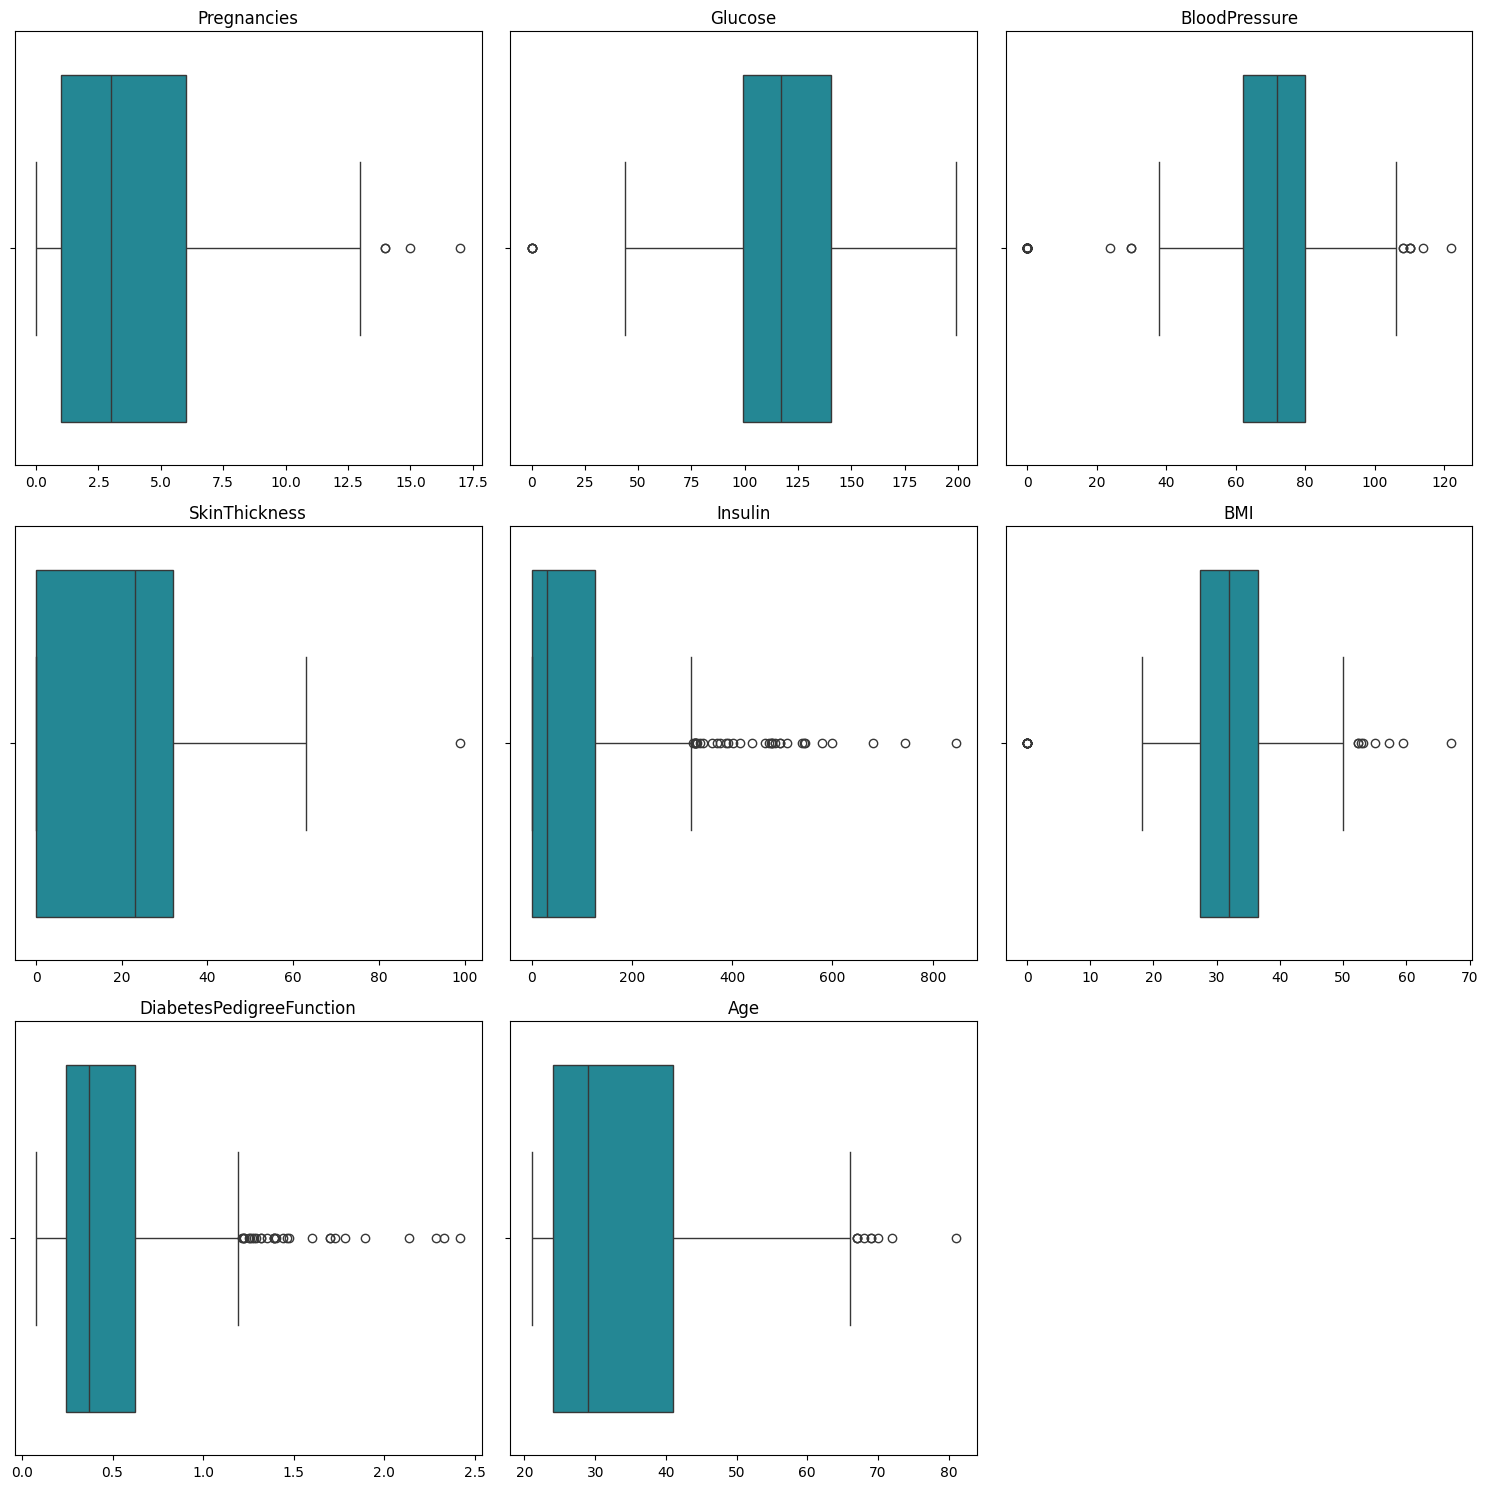

In [14]:
features = [col for col in list(df.columns) if col != 'Outcome']

EDA.numerical_box(features, df)


In [15]:
clean_df = df.copy()
by_mean = ['Glucose', 'BloodPressure','BMI']
by_mode = ['Pregnancies','SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
from edastatmil_milser.edas_tatmil import Do_enum

In [16]:
by_mean_outliers_list=[]
for col in by_mean:
    mean_outliers, clean_df = EDA.outliers_iqr(clean_df, col,2, Do=Do_enum.MEAN)
    by_mean_outliers_list.append(mean_outliers)
by_mean_outliers = pd.concat(by_mean_outliers_list, ignore_index=True)

222.75 16.5
5 outliers have been treated by replacing them with the mean
116.0 26.0
37 outliers have been treated by replacing them with the mean
55.2 8.7
14 outliers have been treated by replacing them with the mean


In [17]:
by_mode_outliers_list=[]
for col in by_mode:
    mode_outliers, clean_df = EDA.outliers_iqr(clean_df, col,1.5, Do=Do_enum.MODE)
    by_mode_outliers_list.append(mode_outliers)
by_mode_outliers = pd.concat(by_mode_outliers_list, ignore_index=True)

13.5 -6.5
4 outliers have been treated by replacing them with the mode
80.0 -48.0
1 outliers have been treated by replacing them with the mode
318.125 -190.875
34 outliers have been treated by replacing them with the mode
1.2 -0.32999999999999996
29 outliers have been treated by replacing them with the mode
66.5 -1.5
9 outliers have been treated by replacing them with the mode


In [18]:
outliers = pd.concat([by_mean_outliers,by_mode_outliers],ignore_index=True)

In [20]:
by_mean_outliers.to_csv('../data/processed/NonSplit/Outliers-Glu-Bold-BMI.csv')
by_mean_outliers.to_csv('../data/processed/NonSplit/Outliers-Preg-Skin-Ins-Diab-Age.csv')
outliers.to_csv('../data/processed/NonSplit/Outliers-All.csv')
clean_df.to_csv('../data/processed/Clean.csv')
df.to_csv('../data/processed/All.csv')

In [21]:
predictors = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'
EDA.splitter('../data/processed/', predictors, target)

{'All_Xtrain':      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 334            1       95             60             18       58  23.9   
 139            5      105             72             29      325  36.9   
 485            0      135             68             42      250  42.3   
 547            4      131             68             21      166  33.1   
 18             1      103             30             38       83  43.3   
 ..           ...      ...            ...            ...      ...   ...   
 71             5      139             64             35      140  28.6   
 106            1       96            122              0        0  22.4   
 270           10      101             86             37        0  45.6   
 435            0      141              0              0        0  42.4   
 102            0      125             96              0        0  22.5   
 
      DiabetesPedigreeFunction  Age  
 334                     0.260   22  
 139    

Normalizadas

In [22]:
EDA.normalize('../data/processed/SplitData/',predictors,scaler='StandardScaler')


{'All_Xtest_norm':      Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 0       0.523387 -0.739446      -0.444600       0.720042  0.956067  0.232733   
 1      -0.590921 -0.289349       0.329998       0.661122 -0.691043  0.433777   
 2      -0.590921 -0.417948      -0.171213      -1.224301 -0.691043 -0.145702   
 3       1.080541 -0.450098       0.557822      -1.224301 -0.691043 -0.878919   
 4       0.801964  0.482248       1.013468      -1.224301 -0.691043 -0.252136   
 ..           ...       ...            ...            ...       ...       ...   
 226    -1.148075 -0.064300      -3.087349      -1.224301 -0.691043  0.043516   
 227    -0.033767 -0.385798      -0.171213       1.368156  0.167188  0.327342   
 228    -1.148075  0.192899       0.557822       0.955720  1.129447  0.504733   
 229     0.523387 -0.514398       0.102175       0.661122 -0.101551 -0.145702   
 230     0.244810 -1.414593       0.648951       1.191398 -0.326945  0.445603   
 
      Di

### Day 3

In [23]:
Xtrain_All = pd.read_csv('../data/processed/SplitData/NormData/All_Xtrain_norm.csv')
ytrain_All = pd.read_csv('../data/processed/SplitData/All_ytrain.csv')

Xtrain_Clean = pd.read_csv('../data/processed/SplitData/NormData/Clean_Xtrain_norm.csv')
ytrain_Clean = pd.read_csv('../data/processed/SplitData/Clean_ytrain.csv')

In [24]:
EDA.feature_sel(Xtrain_All,ytrain_All,k=7,file_name='All_Xtrain', method='SelectKBest', test='mutual_info_regression')

EDA.feature_sel(Xtrain_Clean,ytrain_Clean,k=7,file_name='Clean_Xtrain', method='SelectKBest', test='mutual_info_regression')

C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\milser\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(     Pregnancies   Glucose  SkinThickness   Insulin       BMI  \
 0      -0.841271 -0.895858      -0.157146 -0.016353 -1.233997   
 1       0.442145 -0.563749       0.553619 -0.772052  0.708817   
 2      -1.162125  0.432578       1.393614  2.485270  1.515832   
 3       0.121291  0.299735       0.036699  1.390810  0.140918   
 4      -0.841271 -0.630171       1.135154  0.309379  1.665279   
 ..           ...       ...            ...       ...       ...   
 532     0.442145  0.565422       0.941309  1.052048 -0.531595   
 533    -0.841271 -0.862647      -1.320215 -0.772052 -1.458167   
 534     2.046415 -0.696592       1.070539 -0.772052  2.009008   
 535    -1.162125  0.631844      -1.320215 -0.772052  1.530777   
 536    -1.162125  0.100469      -1.320215 -0.772052 -1.443223   
 
      DiabetesPedigreeFunction       Age  
 0                   -0.650415 -0.958862  
 1                   -1.060894 -0.403205  
 2                   -0.223679 -0.773643  
 3                   -1.056830 -0.

In [25]:
Xtrain_All_Sel = pd.read_csv('../data/processed/SplitData/FeatureSel/All_Xtrain_FeatureSel.csv')

Xtrain_Clean_Sel = pd.read_csv('../data/processed/SplitData/FeatureSel/Clean_Xtrain_FeatureSel.csv')

In [26]:
Xtrain_All_Sel.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [27]:
Xtrain_Clean_Sel.columns


Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [28]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Efectivamente, la selección de características elimina la columna de presión arterial, tal como se sospechaba.








________________________________________

### MODEL


In [30]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from pickle import dump
from sklearn.metrics import accuracy_score

All_model = DecisionTreeClassifier(random_state = 42)
All_model.fit(Xtrain_All_Sel, ytrain_All )
dump(All_model, open("../data/processed/Models/All_decision_tree_regressor_default_42.sav", "wb"))

[Text(0.5933407738095238, 0.9666666666666667, 'Glucose <= 1.042\ngini = 0.455\nsamples = 537\nvalue = [349, 188]\nclass = 0'),
 Text(0.2819196428571429, 0.9, 'Age <= -0.392\ngini = 0.383\nsamples = 454\nvalue = [337, 117]\nclass = 0'),
 Text(0.15119047619047618, 0.8333333333333334, 'Glucose <= 0.206\ngini = 0.22\nsamples = 238\nvalue = [208, 30]\nclass = 0'),
 Text(0.08333333333333333, 0.7666666666666667, 'BMI <= 2.248\ngini = 0.117\nsamples = 192\nvalue = [180, 12]\nclass = 0'),
 Text(0.07380952380952381, 0.7, 'BMI <= -0.076\ngini = 0.1\nsamples = 190\nvalue = [180, 10]\nclass = 0'),
 Text(0.01904761904761905, 0.6333333333333333, 'DiabetesPedigreeFunction <= 0.591\ngini = 0.018\nsamples = 111\nvalue = [110, 1]\nclass = 0'),
 Text(0.009523809523809525, 0.5666666666666667, 'gini = 0.0\nsamples = 96\nvalue = [96, 0]\nclass = 0'),
 Text(0.02857142857142857, 0.5666666666666667, 'DiabetesPedigreeFunction <= 0.666\ngini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = 0'),
 Text(0.01904761904

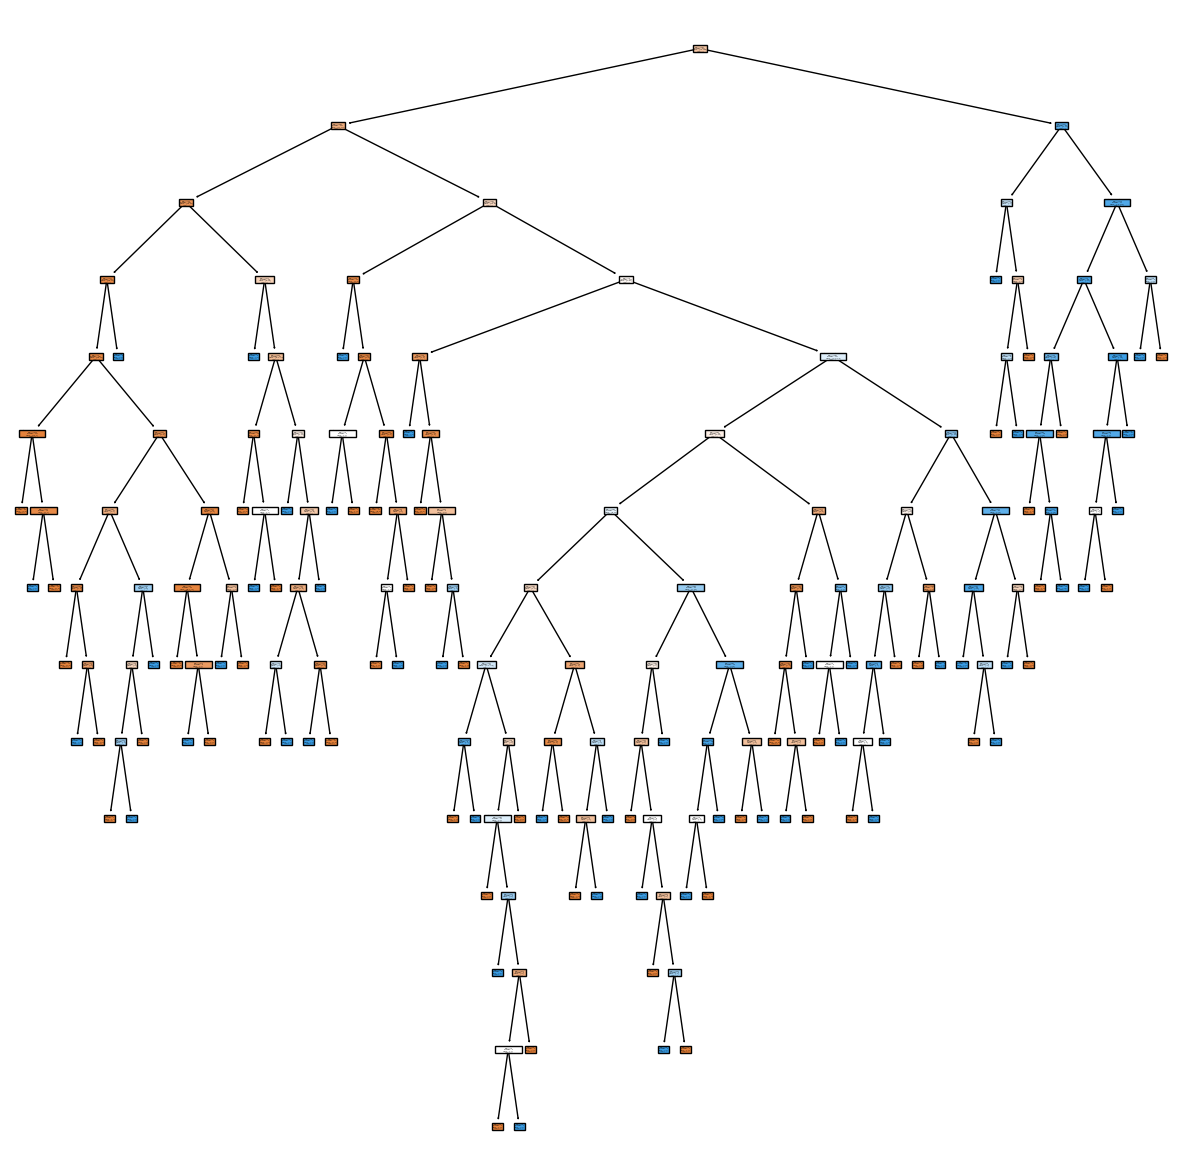

In [31]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(All_model, feature_names = list(Xtrain_All_Sel.columns), class_names = ["0", "1"], filled = True)

[Text(0.6491522082018928, 0.9705882352941176, 'Glucose <= 1.08\ngini = 0.455\nsamples = 537\nvalue = [349, 188]\nclass = 0'),
 Text(0.4055599369085173, 0.9117647058823529, 'Age <= -0.357\ngini = 0.383\nsamples = 454\nvalue = [337, 117]\nclass = 0'),
 Text(0.22870662460567823, 0.8529411764705882, 'Glucose <= 0.183\ngini = 0.221\nsamples = 245\nvalue = [214.0, 31.0]\nclass = 0'),
 Text(0.10094637223974763, 0.7941176470588235, 'BMI <= 2.532\ngini = 0.116\nsamples = 195\nvalue = [183, 12]\nclass = 0'),
 Text(0.08832807570977919, 0.7352941176470589, 'BMI <= -0.113\ngini = 0.098\nsamples = 193\nvalue = [183, 10]\nclass = 0'),
 Text(0.025236593059936908, 0.6764705882352942, 'DiabetesPedigreeFunction <= 1.024\ngini = 0.018\nsamples = 110\nvalue = [109, 1]\nclass = 0'),
 Text(0.012618296529968454, 0.6176470588235294, 'gini = 0.0\nsamples = 96\nvalue = [96, 0]\nclass = 0'),
 Text(0.03785488958990536, 0.6176470588235294, 'DiabetesPedigreeFunction <= 1.128\ngini = 0.133\nsamples = 14\nvalue = [13,

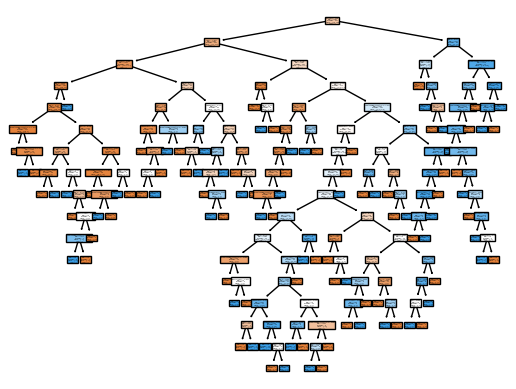

In [32]:
Clean_model = DecisionTreeClassifier(random_state = 42)
Clean_model.fit(Xtrain_Clean_Sel, ytrain_Clean )
dump(Clean_model, open("../data/processed/Models/Clean_decision_tree_regressor_default_42.sav", "wb"))

tree.plot_tree(Clean_model, feature_names = list(Xtrain_Clean_Sel.columns), class_names = ["0", "1"], filled = True)

### Prediccion



In [33]:
Xtest_All = pd.read_csv('../data/processed/SplitData/NormData/All_Xtest_norm.csv')
Xtest_All_Sel = Xtest_All[Xtrain_All_Sel.columns]
ytest_All = pd.read_csv('../data/processed/SplitData/All_ytest.csv')

Xtest_Clean = pd.read_csv('../data/processed/SplitData/NormData/Clean_Xtest_norm.csv')
Xtest_Clean_Sel = Xtest_Clean[Xtrain_Clean_Sel.columns]
ytest_Clean = pd.read_csv('../data/processed/SplitData/Clean_ytest.csv')

In [34]:
All_ypred = All_model.predict(Xtest_All_Sel)

Clean_ypred = Clean_model.predict(Xtest_Clean_Sel)

In [35]:
All_Acc = accuracy_score(ytest_All, All_ypred)
print('Accuracy with all data:',All_Acc)

Clean_Acc = accuracy_score(ytest_Clean, Clean_ypred)
print('Accuracy with clean data:',Clean_Acc)

Accuracy with all data: 0.70995670995671
Accuracy with clean data: 0.7229437229437229


Dado que, en igualdad de condiciones, el modelo más preciso es el que utiliza los datos reemplazando los valores atípicos con la métrica elegida, continuaremos con la optimización de este modelo.

### Optimizacion

In [36]:
from sklearn.model_selection import GridSearchCV


In [37]:
""" BY DEFAULT
param_grid = {
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': [None, 'sqrt','log2',5,7]
}
"""
param_grid = {
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4,10],
    'max_features': [None,'sqrt','log2',5]
}

grid_search = GridSearchCV(estimator=Clean_model, param_grid=param_grid)
grid_search.fit(Xtrain_All_Sel, ytrain_All)

best_dt_model = grid_search.best_estimator_
dump(best_dt_model, open("../data/processed/Models/GridOptimize_All_model.sav", "wb"))
best_params = grid_search.best_params_
dump(best_dt_model, open("../data/processed/Models/GridOptimize_All_params.sav", "wb"))

y_pred = best_dt_model.predict(Xtest_All_Sel)
mse = accuracy_score(ytest_All, y_pred)

print("Best parameters:", best_params)
print("Accuracy:", mse)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.6926406926406926


In [38]:
optimal_model = DecisionTreeClassifier(criterion='gini', max_depth=7, max_features=None,min_samples_leaf=4, min_samples_split=20,random_state = 42)
optimal_model.fit(Xtrain_All, ytrain_All)
dump(optimal_model, open("../data/processed/Models/DTree-crit_gini-depth_7-maxf_none-minleaf_4-minsplit_20.sav", "wb"))